In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')

#### $P(Head)$ Approximating the probability by the long-run relative frequency.

In [57]:
no_of_experiment = 100
process = np.random.randint(0,2,no_of_experiment)
trace_head_prob = []
for i in range(0,no_of_experiment,1):
    trace_head_prob.append(np.sum(process[:i+1])/(i+1))

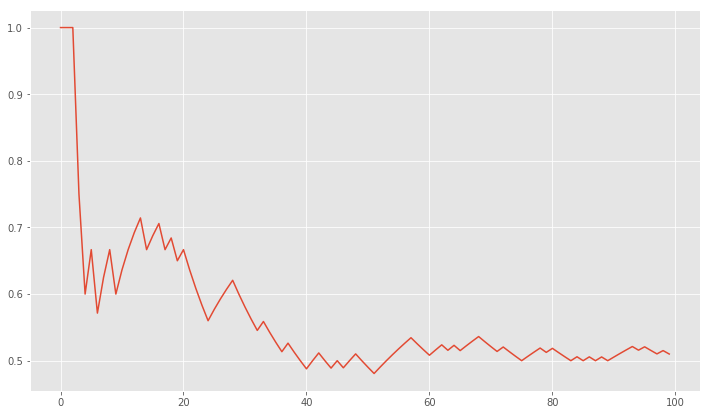

In [58]:
plt.plot(trace_head_prob)

### Normal Distribution

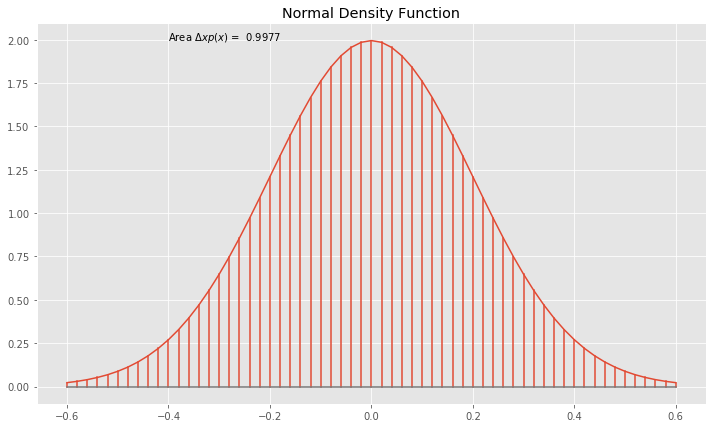

In [85]:
mean = 0.0
std_dev = 0.2
xmin = mean - 3*std_dev
xmax = mean + 3*std_dev
dx  = 0.02
x = np.arange(xmin,xmax,dx)

y = (1/(np.sqrt(2*np.pi*(std_dev**2))))*(np.exp(-((x-mean)**2)/(2*(std_dev**2))))
plt.title("Normal Density Function")
plt.plot(x,y)
plt.stem(x,y,markerfmt=" ");
area = np.round(np.sum(dx*y),4)
plt.text(-0.4,2,"Area $\Delta x p(x) $ =  {}".format(area));

#### Bayes

In [108]:
# theta is the vector of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.
# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 5
# Now make the vector of theta values:
theta = np.linspace(1/(n_theta_vals +1), n_theta_vals /(n_theta_vals +1), n_theta_vals )
print(theta)
print(1-theta)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333]
[0.83333333 0.66666667 0.5        0.33333333 0.16666667]


In [99]:
p_theta = np.minimum(theta, 1-theta)  # Makes a triangular belief distribution.
p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.
print(p_theta)

[0.11111111 0.22222222 0.33333333 0.22222222 0.11111111]


In [109]:
data = np.repeat([1, 0], [3, 9])
n_heads = np.sum(data)
n_tails = len(data) - n_heads
p_data_given_theta = theta**n_heads * (1-theta)**n_tails
print(p_data_given_theta)

[8.97253238e-04 9.63418329e-04 2.44140625e-04 1.50534114e-05
 5.74242072e-08]


In [113]:
#poterior prob (Bayes Rule)
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data  

<StemContainer object of 3 artists>

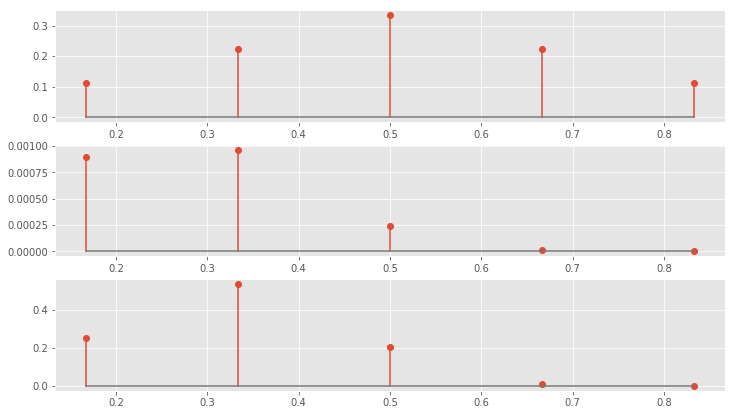

In [119]:
plt.subplot(3,1,1)
plt.stem(theta,p_theta)
plt.subplot(3,1,2)
plt.stem(theta,p_data_given_theta)
plt.subplot(3,1,3)
plt.stem(theta,p_theta_given_data)